In [83]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Data Overview

In [84]:
df = pd.read_csv('marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [85]:
# Check duplicates
df.duplicated(subset = 'user id').sum()

np.int64(0)

In [86]:
# Drop unwanted columns
df.drop(['Unnamed: 0', 'user id'], axis=1, inplace=True)

In [87]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [88]:
# Check if the categorical variables have appropriate number of levels
df_cat = df[['test group', 'converted', 'most ads day',
       'most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [89]:
# Check if the categorical variable have appropriate levels
for i in df_cat.columns:
    print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# Univariate analysis

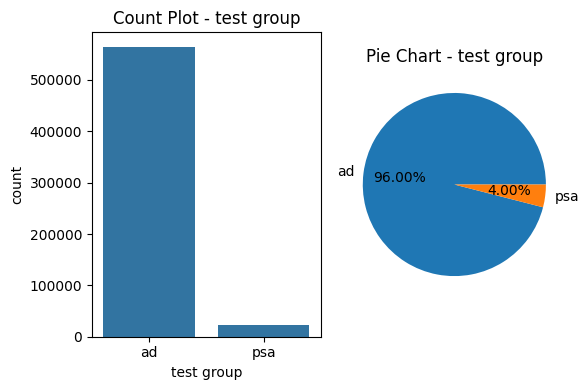

In [90]:
variable = 'test group'

plt.figure(figsize = (6,4))
# Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

# Pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()
plt.show()

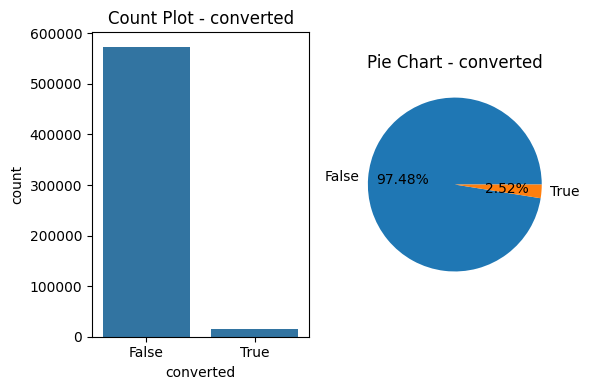

In [91]:
variable = 'converted'

plt.figure(figsize=(6,4))
# Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

# Pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()
plt.show()

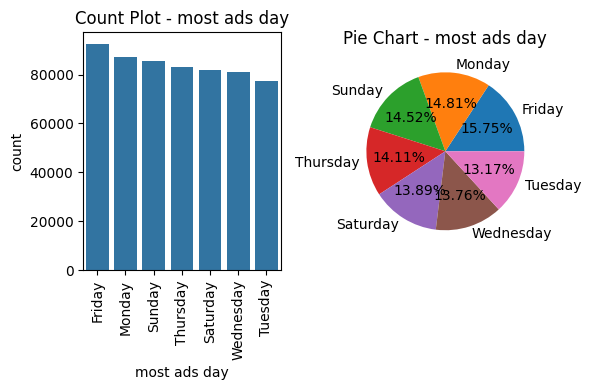

In [92]:
variable = 'most ads day'

plt.figure(figsize=(6,4))
# Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order =df_cat['most ads day'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

# Pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()
plt.show()

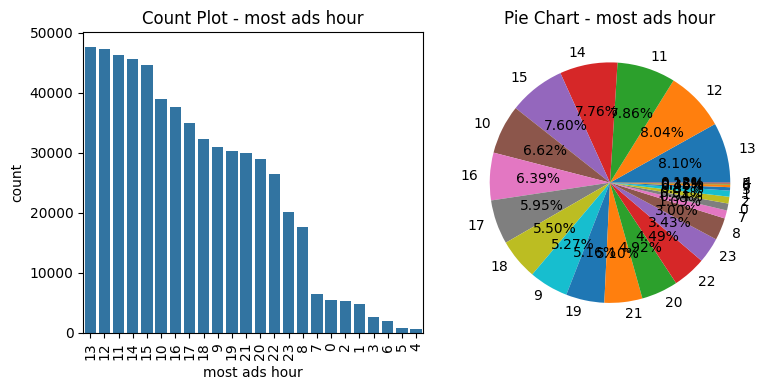

In [93]:
variable = 'most ads hour'

plt.figure(figsize=(8,4))
# Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order =df_cat['most ads hour'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

# Pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()
plt.show()

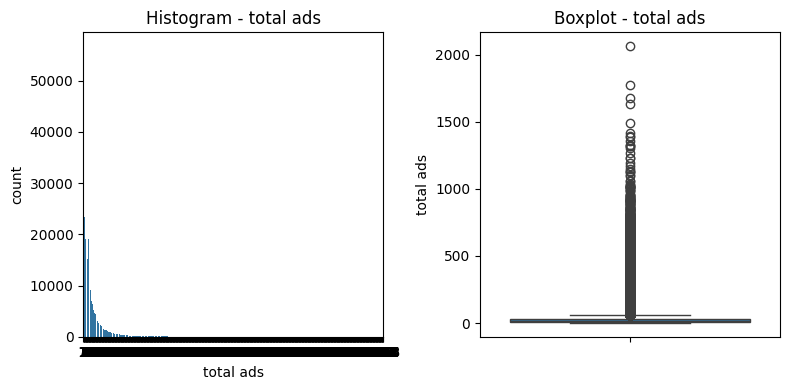

In [94]:
variable = 'total ads'

plt.figure(figsize=(8,4))
# Histpgram
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df)
plt.title(f'Histogram - {variable}')

# Pie chart
plt.subplot(1,2,2)
sns.boxplot(y= variable, data=df)
plt.title(f'Boxplot - {variable}')

# Adjust layout
plt.tight_layout()
plt.show()

In [95]:
# Check descriptive stats of this feature
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

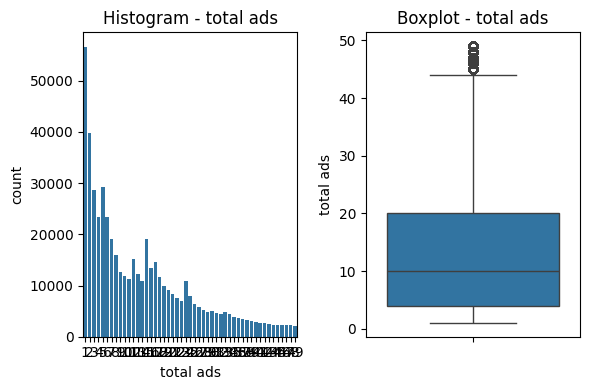

In [96]:
variable = 'total ads'

plt.figure(figsize=(6,4))
# Histpgram
plt.subplot(1,2,1)
# Filtering the data for a value close to 75th percentile only for better visualization
sns.countplot(x=variable, data=df[df['total ads'] < 50])
plt.title(f'Histogram - {variable}')

# Pie chart
plt.subplot(1,2,2)
sns.boxplot(y= variable, data=df[df['total ads'] < 50])
plt.title(f'Boxplot - {variable}')

# Adjust layout
plt.tight_layout()
plt.show()

When analyzing the "converted" variable, I observe that very few people converted (only 2.5%), while the majority did not convert. When analyzing the "most ads day" variable, I see that Friday has the highest number of ads, followed by Monday.

For the "most ads hour" variable, I made adjustments to the chart to prevent overlap, as there were too many categories. The chart shows that ads are most frequently displayed at 1 PM, followed by 12 PM, 11 AM, and the least during the early morning hours after midnight.

Finally, I performed variable analysis with the "converted" column using a histogram and box plot. After detecting that the data had many outliers, I adjusted the numerical column to improve visualization.

# Bivariate analysis

Create cross-tabulations to analyze relationships between categorical variables and the conversion status.

In [97]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [98]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize='index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

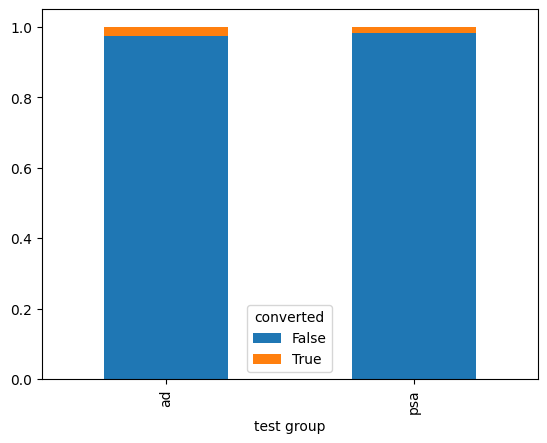

In [99]:
ct_conversion_test_group.plot.bar(stacked = True)

The plot depicts a bar plot illustrating the likelihood of users making a purchase after encountering either an advertisement (ad) or a public service announcement (PSA). The plot reveals a notably higher purchase probability among users exposed to ads compared to those who viewed PSAs. This observation implies that advertisements exert a more substantial influence on purchasing decisions than PSAs.

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

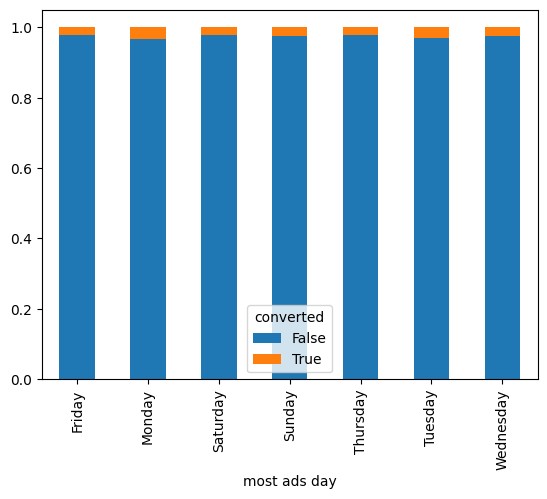

In [100]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize='index')
print(ct_conversion_day.sort_values(by=True, ascending=False))
ct_conversion_day.plot.bar(stacked = True)

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


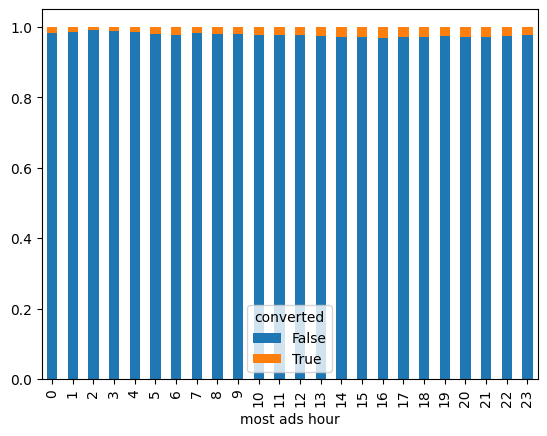

In [101]:
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize='index')
print(ct_conversion_hour.sort_values(by=True,ascending=False))
ct_conversion_hour.plot.bar(stacked = True);

<Axes: xlabel='converted', ylabel='total ads'>

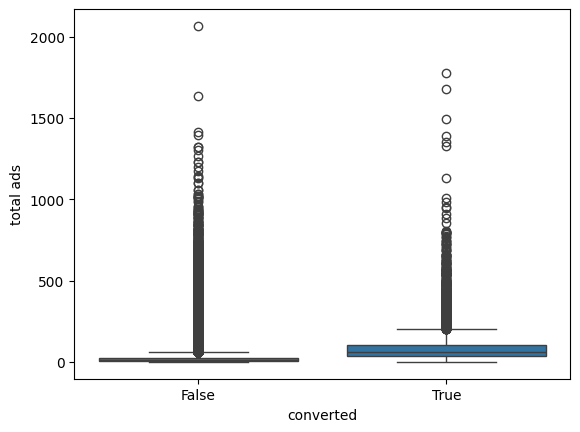

In [102]:
sns.boxplot(x='converted', y='total ads', data=df)

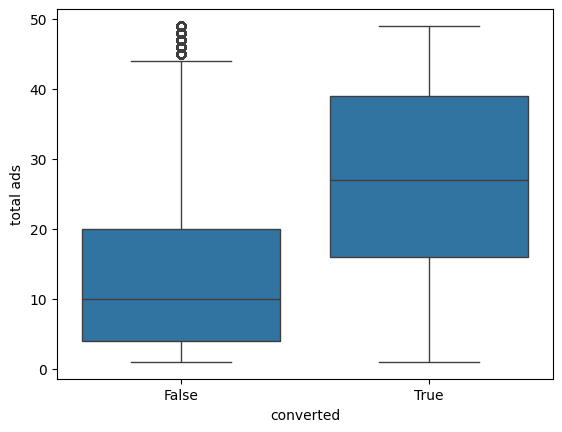

In [103]:
sns.boxplot(x='converted', y='total ads', data=df[df['total ads'] <50]);

# Statistical Tests

* `Chi-Square Test`: Assess the independence of categorical variables with respect to conversion status. Determine if there is a statistically significant difference in conversion rates based on different features.

* `Man-Whitney U Test`: When assumptions for parametric tests (like normality and equality of variances) are not met, use the non-parametric Man-Whitney U test to compare distributions of numerical data (total ads seen) between groups with different conversion statuses.

In [104]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
    if variable != 'converted':
        # Create a contigency table (cross-tabulation)
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])
        # Perform chi-squared test
        chi2, p, _, _ = chi2_contingency(contingency_table)
        # Display the results
        print(f'\nChi-squared test for {variable} vs. converted:')
        print(f'Chi-squared value: {chi2}')
        print(f'p-value: {p}')

        # Check for significance
        if p < alpha:
            print(f'The difference in conversion rates across {variable} is statistically significant.')
        else:
            print(f'There is no significant difference in conversion rates across {variable}.')


Chi-squared test for test group vs. converted:
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant.

Chi-squared test for most ads day vs. converted:
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant.

Chi-squared test for most ads hour vs. converted:
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant.


All three tests show statistically significant results, meaning that the factors being tested (type of content, day, and hour) all have a significant impact on conversion rates.
The extremely low p-values suggest that these differences are unlikely to be due to random chance and are likely to be meaningful.
These findings can be used to optimize advertising strategies by focusing on the type of content, the specific days, and the times that yield the highest conversion rates.

In [105]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [106]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
#Step 1: Check Assumptions
# Normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro (df [df ['converted'] == True] ['total ads']) 
shapiro_stat_false, shapiro_p_value_false = shapiro (df [df ['converted'] == False] ['total ads'])
print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")
#Equality of variances assumption
levene_stat, levene_p_value = levene (df [df ['converted']] ['total ads'], df [~df ['converted']] ['total ads'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

Shapiro-Wilk test for normality (True group): p-value = 1.638680987007864e-98
Shapiro-Wilk test for normality (False group): p-value = 9.883049430733551e-204
Levene's test for equality of variances: p-value = 0.0


* Normality: Both groups (True and False) do not follow a normal distribution, as indicated by the very small p-values from the Shapiro-Wilk test. This suggests that parametric tests that assume normality may not be appropriate for this data.
* Variance Equality: The Levene's test indicates that the variances between the two groups are significantly different. This is important to consider when choosing statistical tests, as many tests assume equal variances.

-> For comparing means between the groups, I might consider tests like the Mann-Whitney U test or other methods suitable for non-normally distributed data with unequal variances.

In [107]:
# Step 2: Perform a suitable test
alpha = 0.05
if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    # Assumptions met - use t-test for means
    t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f'Independent two-sample t-test: p-value = {t_p_value}')
else:
    # Assumption not met - use Mann_whitney U test for medians
    u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f'Man-Whitney U test: p-value = {u_p_value}')

Man-Whitney U test: p-value = 0.0


* Based on chi-squared tests, I conclude that I can reject null hypothesis and that the difference in purchasing across test groups, the days the ads are shown, as well as the hours is statisticly significant.
* Purchasing is not the same for amount of ads seen by person. A p-value of 0.0 indicates that there is a statistically significant difference between the distribution of "total_ads" for individuals who purchased and those who did not.
* I noticed that people who saw an ad more than once ended up making a purchase, so we conclude that persistently displaying ads is profitable for the company.